# Introduction 
## QQQ format

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/notes.csv')

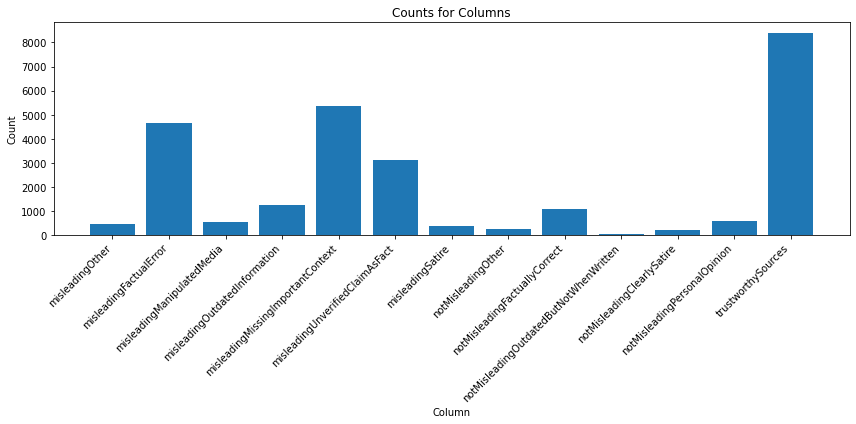

In [9]:
# Columns to plot
columns = ['misleadingOther', 'misleadingFactualError', 'misleadingManipulatedMedia',
           'misleadingOutdatedInformation', 'misleadingMissingImportantContext',
           'misleadingUnverifiedClaimAsFact', 'misleadingSatire', 'notMisleadingOther',
           'notMisleadingFactuallyCorrect', 'notMisleadingOutdatedButNotWhenWritten',
           'notMisleadingClearlySatire', 'notMisleadingPersonalOpinion', 'trustworthySources']

# Count the occurrences of True and False values for each column
counts = data[columns].sum().reset_index()
counts.columns = ['Column', 'Count']

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(counts['Column'], counts['Count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Column')
plt.ylabel('Count')
plt.title('Counts for Columns')
plt.tight_layout()
plt.show()

In [11]:
import numpy as np

<Figure size 1080x432 with 0 Axes>

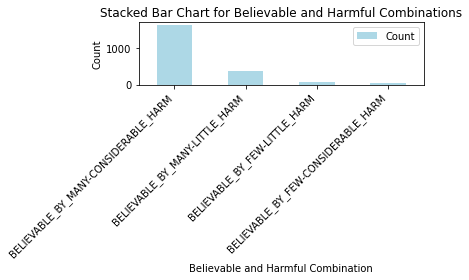

In [16]:
df_b_h = data[['believable', 'harmful']]

# Replace NaN with 'Unknown'
df_b_h = df_b_h.fillna('Unknown')  # Use fillna to replace NaN values with 'Unknown'

# Combine the 'believable' and 'harmful' columns into a single column for counting occurrences
df_b_h['Combination'] = df_b_h['believable'] + '-' + df_b_h['harmful']

# Count the occurrences
counts = df_b_h['Combination'].value_counts().reset_index()
counts.columns = ['Combination', 'Count']

# Remove the 'Unknown-Unknown' group
counts = counts[counts['Combination'] != 'Unknown-Unknown']

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
ax = counts.plot(kind='bar', x='Combination', y='Count', stacked=True, color=['lightblue'])
plt.xlabel('Believable and Harmful Combination')
plt.ylabel('Count')
plt.title('Stacked Bar Chart for Believable and Harmful Combinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

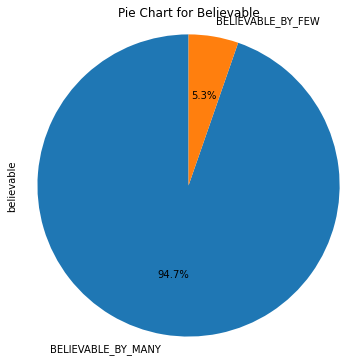

In [17]:
# Count the occurrences of 'believable' values
believable_counts = data['believable'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
ax = believable_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for Believable')
plt.show()

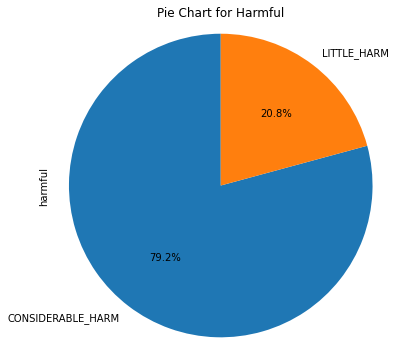

In [18]:
# Count the occurrences of 'harmful' values
harmful_counts = data['harmful'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
ax = harmful_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for Harmful')
plt.show()

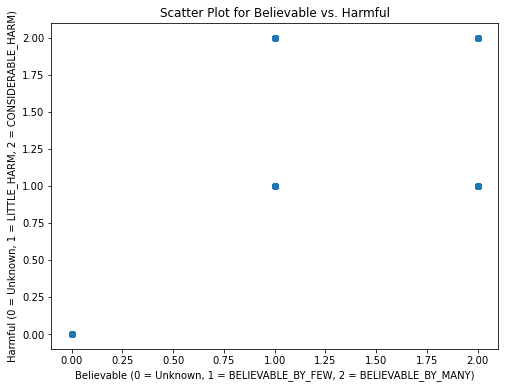

In [19]:
# Replace NaN with 'Unknown'
data['believable'] = data['believable'].replace({np.nan: 'Unknown'})
data['harmful'] = data['harmful'].replace({np.nan: 'Unknown'})

# Assign numerical values to categories
believable_mapping = {'BELIEVABLE_BY_MANY': 2, 'BELIEVABLE_BY_FEW': 1, 'Unknown': 0}
harmful_mapping = {'CONSIDERABLE_HARM': 2, 'LITTLE_HARM': 1, 'Unknown': 0}

data['believable_num'] = data['believable'].map(believable_mapping)
data['harmful_num'] = data['harmful'].map(harmful_mapping)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['believable_num'], data['harmful_num'], alpha=0.5)
plt.xlabel('Believable (0 = Unknown, 1 = BELIEVABLE_BY_FEW, 2 = BELIEVABLE_BY_MANY)')
plt.ylabel('Harmful (0 = Unknown, 1 = LITTLE_HARM, 2 = CONSIDERABLE_HARM)')
plt.title('Scatter Plot for Believable vs. Harmful')
plt.show()

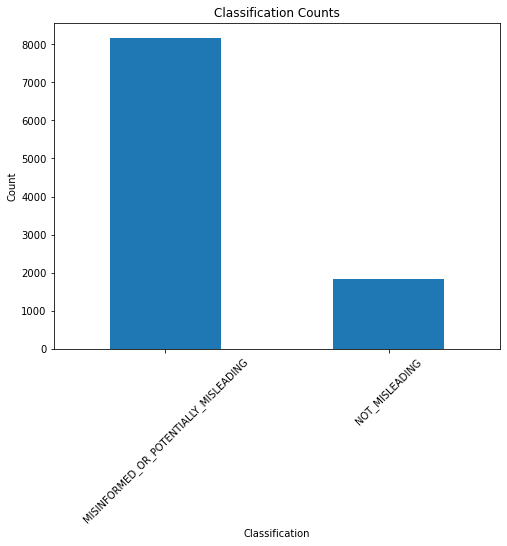

In [20]:
# Count the occurrences of each classification
classification_counts = data['classification'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Classification Counts')
plt.xticks(rotation=45)
plt.show()